In [1]:
import os 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.colors import LogNorm

pastaDados = r"C:\Users\marcos perrude\Documents\ENS410064\dados\trab_final"
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

['ClipBR.nc', 'HAQ_TROPOMI_NO2_GLOBAL_QA75_L3_Monthly_012019_V2.4_20240719.nc4', 'MERRA2_300.inst3_3d_chm_Nv.20080201.nc4']
['MERRA2_300.inst3_3d_chm_Nv.20080201.nc4']


In [2]:
import netCDF4 as nc
dataset= nc.Dataset(pastaDados+ '\\' + prefixed[0])
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Wed Jan 14 12:05:24 2015 GMT
    Comment: GMAO filename: d5124_m2_jan00.inst3_3d_chm_Nv.20080201.nc4
    Filename: MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2I3NVCHM
    GranuleID: MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    ProductionDateTime: Original file generated: Wed Jan 14 12:05:24 2015 GMT
    LongName: MERRA2 inst3_3d_chm_Nv: 3d,3-Hourly,Instantaneous,Model-Level,Assimilation,Carbon Monoxide and Ozone Mixing Ratio
    Title: MERRA2 inst3_3d_chm_Nv: 3d,3-Hourly,Instantaneous,Model-Level,Assimilation,Carbon Monoxide and Ozone Mixing Ratio
    Southernmos

In [3]:
os.chdir(pastaDados)
import xarray as xr
xds = xr.open_mfdataset(prefixed)  
xds

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 576, lat: 361, lev: 72, time: 8)
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 576B 1.0 2.0 3.0 4.0 5.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 64B 2008-02-01 ... 2008-02-01T21:00:00
Data variables:
    AIRDENS  (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    CO       (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DELP     (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    O3       (time, lev, lat, lon) float32 479MB dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    PS       (time, lat, lon) float32 7MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Wed Jan 14 12...
    Comment:                           GMAO filename: d5124_m2_jan00.inst3_3d...
    Filename:                          MERRA2_300.inst3_3d_chm_Nv.20080201.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HO9OVZWF3KW2
    RangeBeginningDate:                2008-02-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2008-02-01
    RangeEndingTime:                   21:00:00.000000

In [4]:
co = xds['CO'][:,71,:,:]   #Superficie (P = 985 Hpa e Mol / Mol)
print(co.shape) #(time , lev, .lat, lon)

(8, 361, 576)


In [5]:
co = co*28000

<xarray.DataArray 'lat' ()> Size: 8B
array(35.)
Coordinates:
    lat      float64 8B 35.0
Attributes:
    long_name:    latitude
    units:        degrees_north
    vmax:         1000000000000000.0
    vmin:         -1000000000000000.0
    valid_range:  [-1.e+15  1.e+15]
<xarray.DataArray 'lon' ()> Size: 8B
array(-55.)
Coordinates:
    lon      float64 8B -55.0
Attributes:
    long_name:    longitude
    units:        degrees_east
    vmax:         1000000000000000.0
    vmin:         -1000000000000000.0
    valid_range:  [-1.e+15  1.e+15]


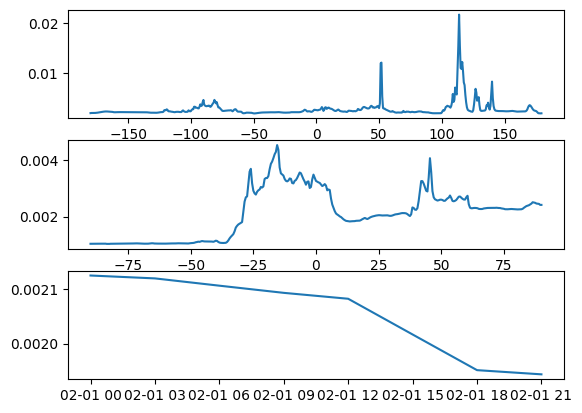

In [6]:

fig,ax = plt.subplots(3)

# Para o tempo - time = 0 em y = 250
ax[0].plot(xds['lon'][:],co[0,250,:])
print(xds['lat'][250])

# Para o tempo - time = 0 em x = 200
ax[1].plot(xds['lat'][:],co[0,:,200])
print(xds['lon'][200])


# Para todo o tempo em um ponto específico
ax[2].plot(xds['time'][:],co[:,250,200])

0   -73.99045
Name: minx, dtype: float64


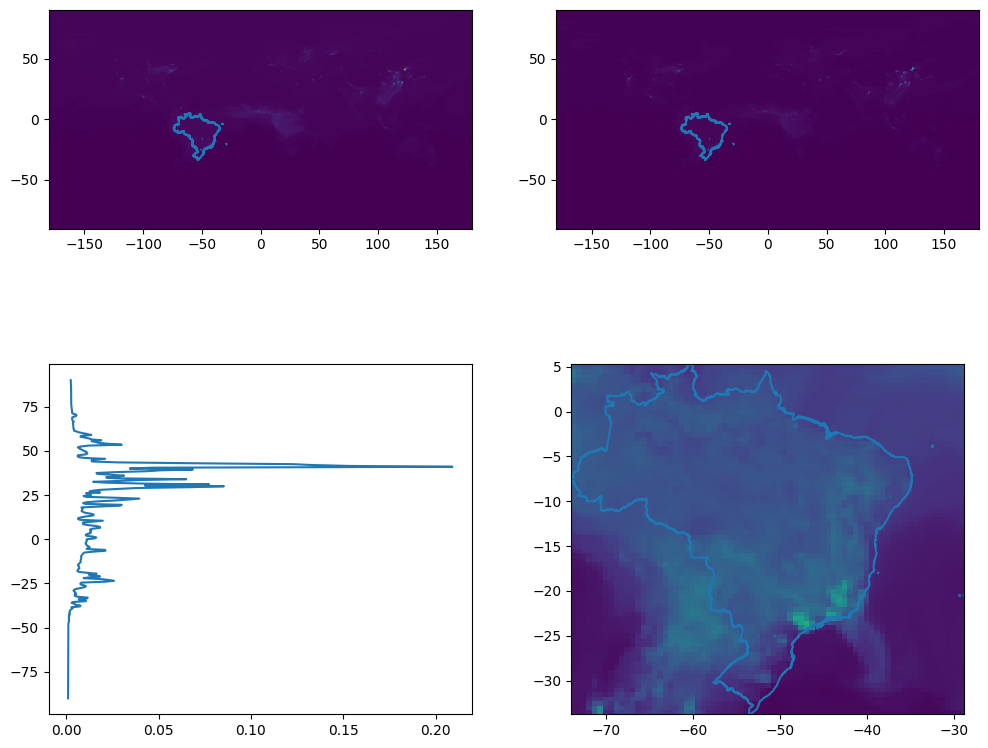

In [7]:


br = gpd.read_file(r"C:\Users\marcos perrude\Documents\ENS410064\dados\BR_Pais_2022 (1)\BR_Pais_2022.shp")

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].pcolor(xds['lon'][:], xds['lat'], np.mean(co, axis=0))  #Média 
br.boundary.plot(ax=ax[0, 0])

ax[0, 1].pcolor(xds['lon'][:], xds['lat'], np.max(co, axis=0)) #Máxima 
br.boundary.plot(ax=ax[0, 1])

ax[1, 1].pcolor(xds['lon'][:], xds['lat'], np.max(co, axis=0), norm=matplotlib.colors.LogNorm())
br.boundary.plot(ax=ax[1, 1])
print(br.bounds.minx)

ax[1, 1].set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax[1, 1].set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])

ax[1, 0].plot(np.max(np.max(co[:, :, :], axis=0), axis=1), xds['lat'][:])
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\Trabfinal\1.png")

In [8]:
import xarray
import rioxarray
import geopandas
from shapely.geometry import mapping

da0 = xr.DataArray(
      data = co,
      dims = ["time","y","x"],
      coords = dict(
            x = (["x"], xds['lon'].to_numpy()),
            y = (["y"], xds['lat'].to_numpy()),
      )
)
da = da0.rio.write_crs("epsg:4326", inplace=True)


#xds.rio.write_crs("EPSG:4326", inplace=True)
geodf = br.copy()

clipped = da.rio.clip(geodf.geometry.apply(mapping), geodf.crs,drop=False)
clipped.to_netcdf('ClipBR.nc')

128 210


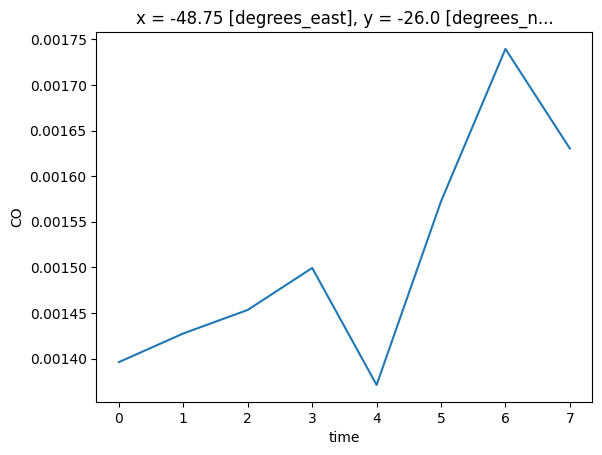

In [9]:

lat = np.argmin(abs(dataset['lat'][:] - (-26)))
lon = np.argmin(abs(dataset['lon'][:] - (-49)))

arr = clipped.isel(y=lat, x=lon)
arr.plot()
print(lat,lon)

0   -73.99045
Name: minx, dtype: float64


(-33.7511779939999, 5.27184107700003)

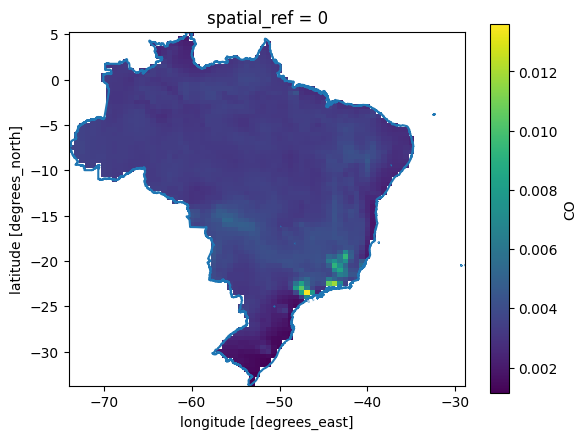

In [10]:
air2d = clipped.mean(dim='time')
fig,ax = plt.subplots()
air2d.plot(ax=ax)
br.boundary.plot(ax=ax)
print(br.bounds.minx)
ax.set_xlim([br.bounds.minx[0], br.bounds.maxx[0]])
ax.set_ylim([br.bounds.miny[0], br.bounds.maxy[0]])

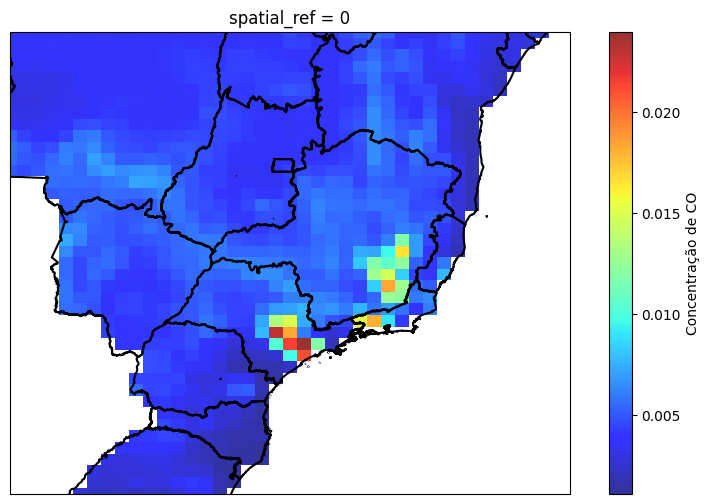

In [13]:
import cartopy.crs as ccrs
s = gpd.read_file(r"C:\Users\marcos perrude\Downloads\BR_UF_2022 (1)\BR_UF_2022.shp")

time_index = 0
co_data_at_time = clipped.isel(time=3)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-60, -35, -30, -10], crs=ccrs.PlateCarree())  # [-55, -35, -30, -20]
co_data_at_time.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cm.jet,alpha = 0.8, cbar_kwargs={'label': 'Concentração de CO'})
s.boundary.plot(ax=ax, color = 'black')


plt.show()

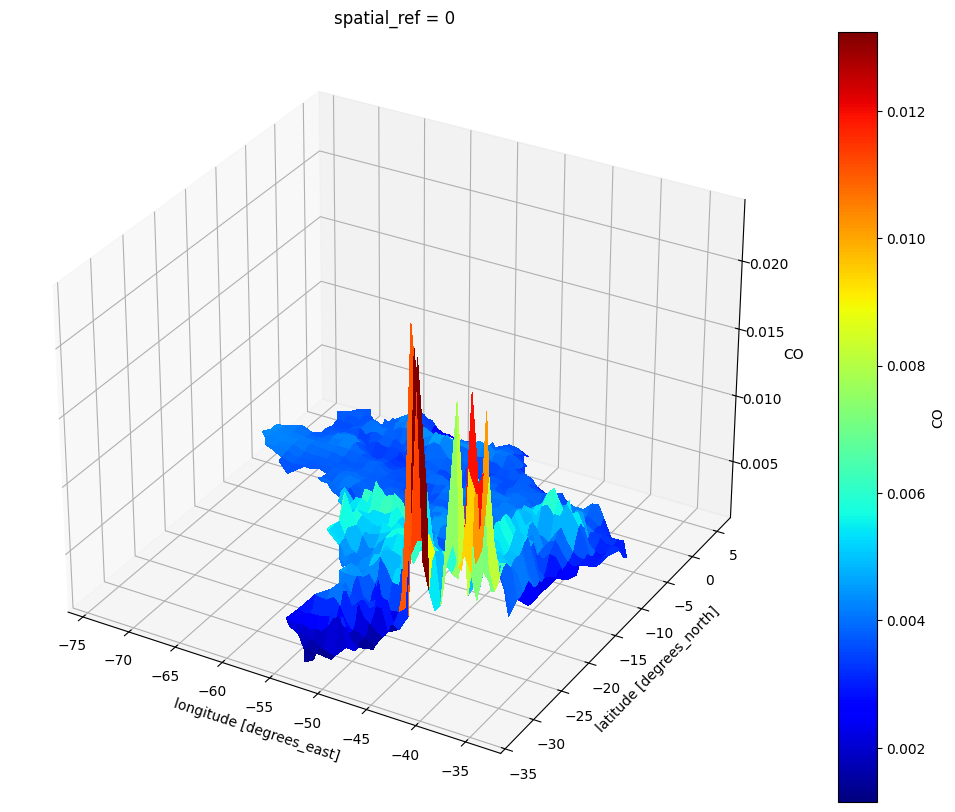

In [14]:
from matplotlib import cm
lat_min, lat_max = -33, 5  
lon_min, lon_max = -74, -34 

# Realizar o corte para o Brasil no xarray
clipped_brasil = clipped_time_3.sel(
    y=slice(lat_min, lat_max),  # Limita a variável y (latitude)
    x=slice(lon_min, lon_max)   # Limita a variável x (longitude)
)

ax = clipped_brasil.plot.surface(x='x', y='y', figsize = (15,10), cmap= cm.jet,
                                linewidth=0, antialiased=False)

plt.show()

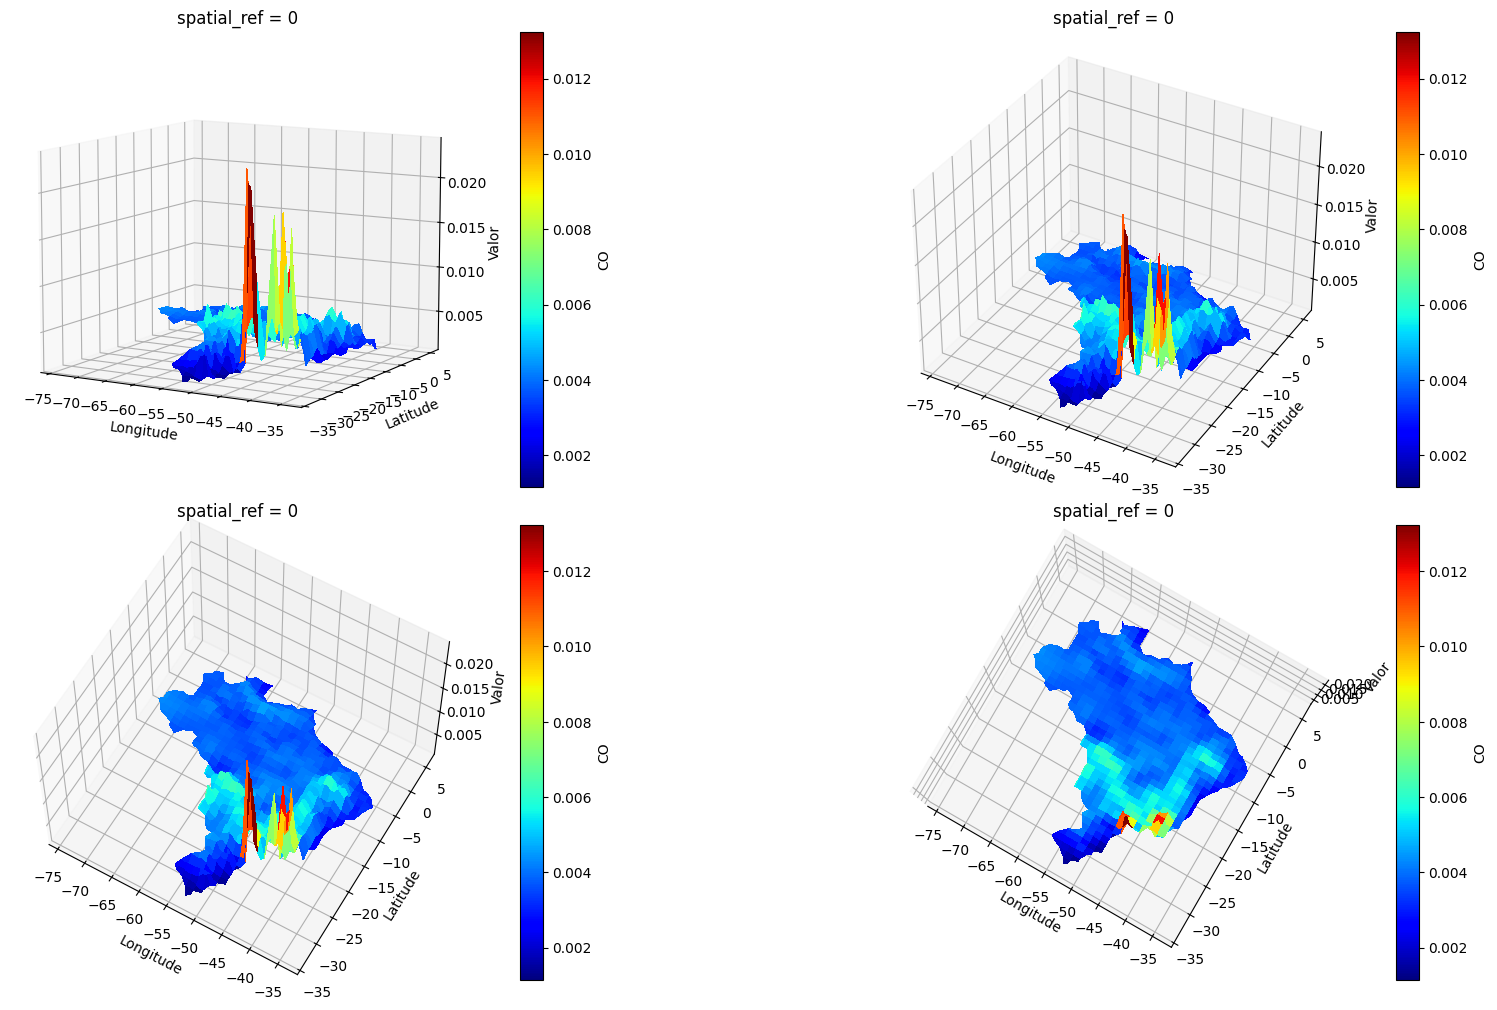

In [15]:
from matplotlib import cm

lat_min, lat_max = -33, 5  
lon_min, lon_max = -74, -34 

clipped_brasil = clipped_time_3.sel(
    y=slice(lat_min, lat_max), 
    x=slice(lon_min, lon_max)
)
view_angles = [(10, -60), (35, -60), (60, -60), (85, -60)] 
fig, axes = plt.subplots(2, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})

for i, (ax, (elev, azim)) in enumerate(zip(axes.flatten(), view_angles)):
    surf = clipped_brasil.plot.surface(x='x', y='y', ax=ax, cmap=cm.jet, linewidth=0, antialiased=False)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Valor')

plt.tight_layout()
plt.show()


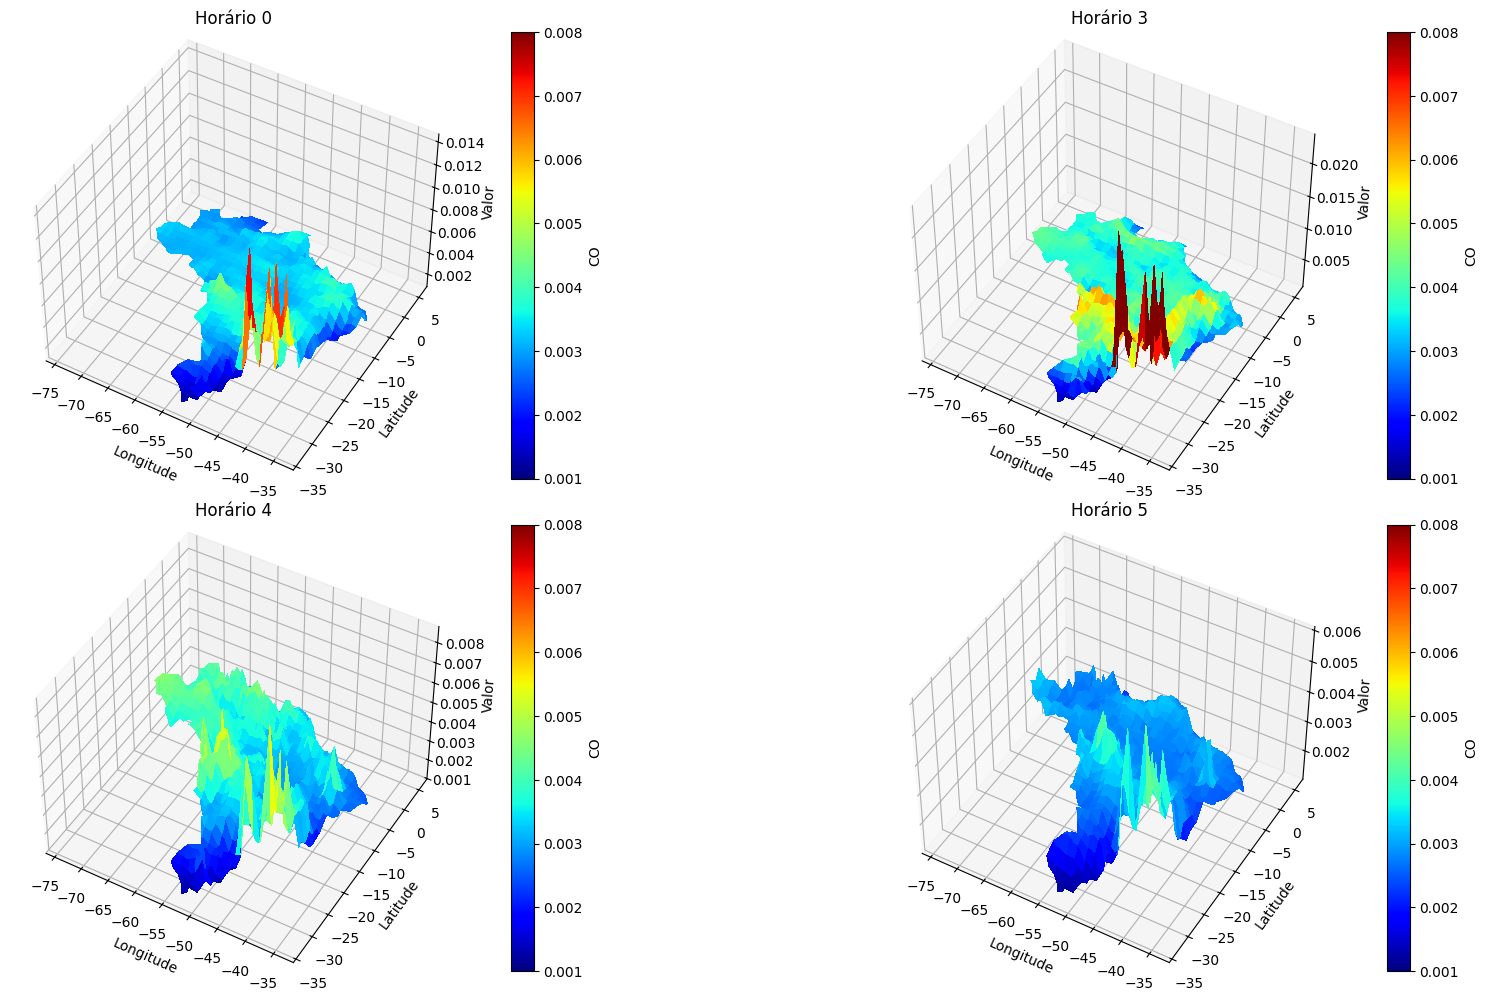

In [16]:
times_to_plot = [0, 3, 4, 5]
vmin = 0.001
vmax = 0.0080

fig, axes = plt.subplots(2, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})
for i, (ax, time_val) in enumerate(zip(axes.flatten(), times_to_plot)):
    clipped_time = clipped.sel(time=time_val) 
    clipped_brasil = clipped_time.sel(
        y=slice(lat_min, lat_max),  
        x=slice(lon_min, lon_max)  
    )
    
    surf = clipped_brasil.plot.surface(x='x', y='y', ax=ax, cmap=cm.jet, linewidth=0, antialiased=False, vmin=vmin, vmax=vmax)
    ax.view_init(elev= 45, azim=-60)
    ax.set_title(f'Horário {time_val}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Valor')
    
plt.tight_layout()
plt.show()


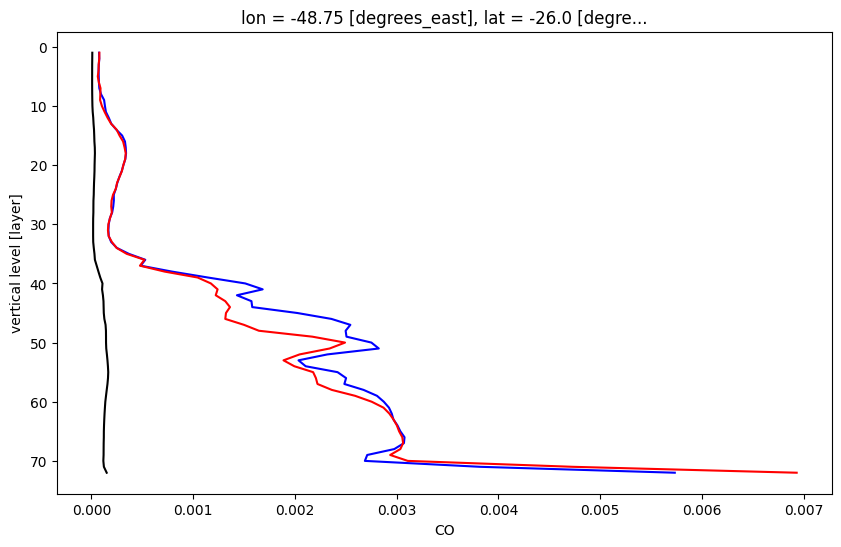

In [17]:
a = xds['CO'][3, :, 140, 214]  #lat -20, lon -46
b = xds['CO'][3, :, 136, 219]  #lat -22, #lon -43
c = xds['CO'][3, :, 128, 210] # lar -26 lon -49
a = a * 28000
b = b * 28000
c=c*2800
fig, ax = plt.subplots(figsize=(10, 6))

a.plot(ax=ax, y='lev', color='blue')
b.plot(ax=ax, y='lev',  color='red')
c.plot(ax=ax, y='lev', color='black')
ax.invert_yaxis()